In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Add every font at the specified location
font_dir = ['fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)


Noto Sans KR
Ansungtangmyun
Noto Sans KR
Noto Sans KR
Noto Sans KR
Ansungtangmyun
Noto Sans KR
LINE Seed Sans KR
Noto Sans KR
LINE Seed Sans KR
LINE Seed Sans KR
EF_????
LINE Seed Sans KR
LINE Seed Sans KR
LINE Seed Sans KR
EF_????


In [58]:
%pwd

'C:\\python'

In [59]:
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [61]:
survey_raw_df = pd.read_csv("datas/survey_results_public.csv", index_col="ResponseId")

In [62]:
selected_columns = [
    #인구통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    #프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    #고용관련정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [63]:
survey_df = survey_raw_df[selected_columns].copy()

In [64]:
schema_raw = pd.read_csv("datas/survey_results_schema.csv", index_col = "qname")["question"]

In [65]:
def split_multicolumn(col_series):
    result_df = pd.DataFrame(col_series)
    options = []
    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            result_df.at[idx, option] = True
    return result_df[options]

In [66]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",...,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [43]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            28701
Developer, back-end                              26595
Developer, front-end                             15915
Developer, desktop or enterprise applications     9546
Developer, mobile                                 7634
DevOps specialist                                 6170
Student                                           5595
Cloud infrastructure engineer                     5283
Database administrator                            4934
System administrator                              4908
Developer, embedded applications or devices       3923
Project manager                                   3897
Designer                                          3764
Engineer, data                                    3600
Engineering manager                               3574
Data scientist or machine learning specialist     3424
Data or business analyst                          3201
Developer, QA or test                             3096
Academic r

In [52]:
devtype_percentage = dev_type_totals / dev_type_totals.sum() * 100
devtype_percentage

Developer, full-stack                            17.416712
Developer, back-end                              16.138722
Developer, front-end                              9.657746
Developer, desktop or enterprise applications     5.792827
Developer, mobile                                 4.632563
DevOps specialist                                 3.744159
Student                                           3.395230
Cloud infrastructure engineer                     3.205898
Database administrator                            2.994114
System administrator                              2.978336
Developer, embedded applications or devices       2.380606
Project manager                                   2.364828
Designer                                          2.284119
Engineer, data                                    2.184599
Engineering manager                               2.168821
Data scientist or machine learning specialist     2.077796
Data or business analyst                          1.9424

In [76]:
devtype_percentage.sum()

100.00000000000001

In [54]:
%matplotlib inline

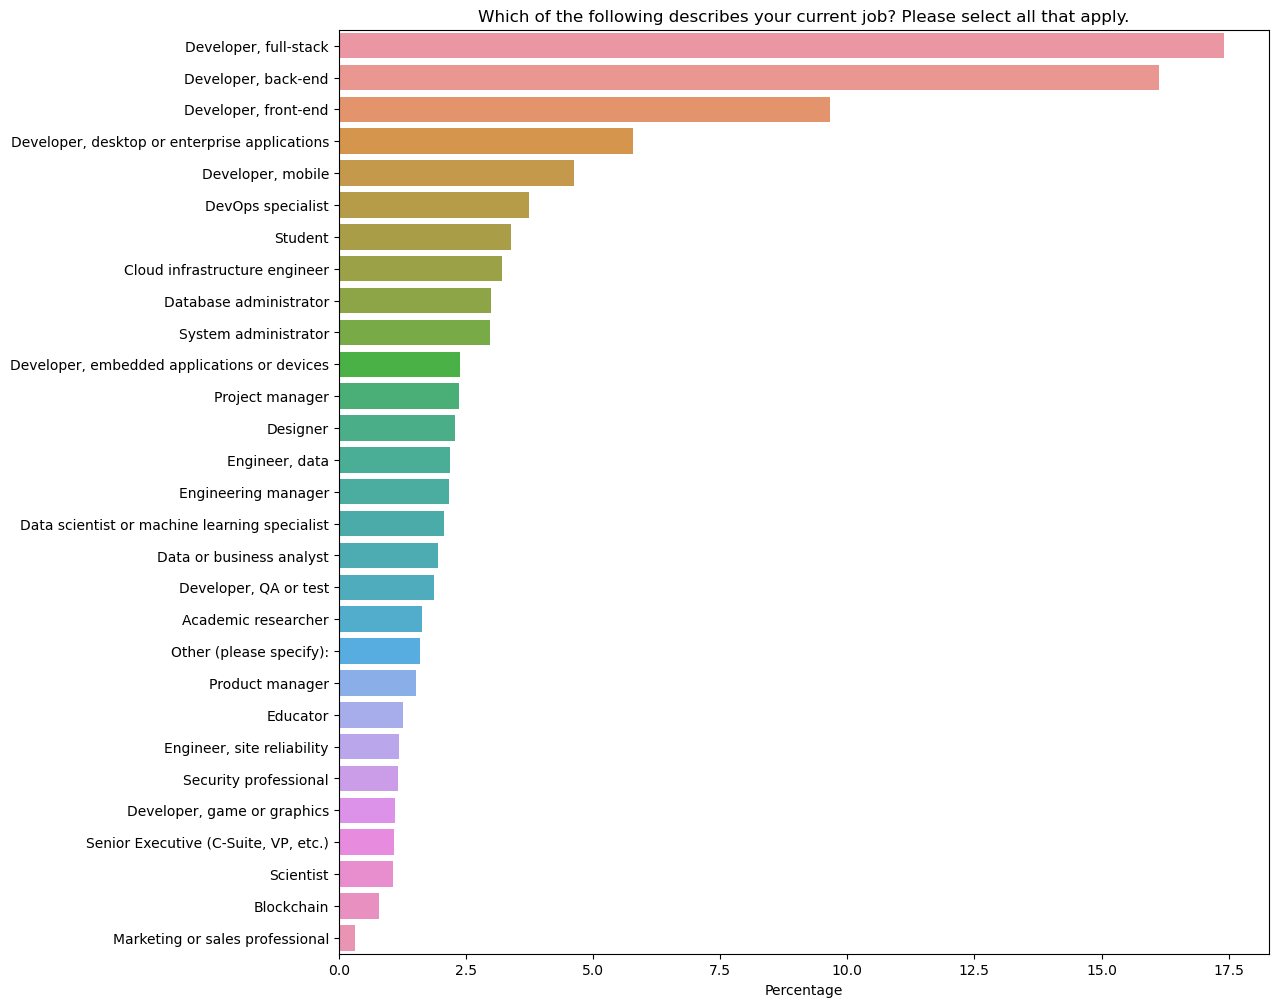

In [71]:
plt.figure(figsize=(12, 12))
sns.barplot(x=devtype_percentage, y=devtype_percentage.index)
plt.title(schema_raw["DevType"])
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()

In [72]:
survey_df["LanguageHaveWorkedWith"]

ResponseId
1                                                      NaN
2                                    JavaScript;TypeScript
3                        C#;C++;HTML/CSS;JavaScript;Python
4                             C#;JavaScript;SQL;TypeScript
5              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73264    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73265            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73266                   HTML/CSS;JavaScript;PHP;Python;SQL
73267                                        C#;Delphi;VBA
73268          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

In [77]:
LanguageHaveWorkedWith_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
LanguageHaveWorkedWith_df

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,Lua,PHP,...,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,True,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,True,True,False,False,False,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73266,True,False,False,False,True,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [78]:
lang_totals = LanguageHaveWorkedWith_df.sum().sort_values(ascending=False)
lang_totals

JavaScript     46443
HTML/CSS       39142
SQL            35127
Python         34155
TypeScript     24752
Java           23644
Bash/Shell     20656
C#             19883
C++            16024
PHP            14827
C              13692
PowerShell      8575
Go              7922
Rust            6625
Kotlin          6507
Dart            4648
Ruby            4299
Assembly        3887
Swift           3489
R               3308
VBA             3185
MATLAB          2913
Lua             2867
Groovy          2357
Delphi          2311
Scala           1837
Objective-C     1698
Perl            1644
Haskell         1577
Elixir          1528
Julia           1084
Clojure         1070
Solidity        1031
LISP             932
F#               730
Fortran          646
Erlang           641
APL              504
COBOL            464
SAS              435
OCaml            422
Crystal          340
dtype: int64

In [79]:
lang_percentage = lang_totals / lang_totals.sum() * 100
lang_percentage

JavaScript     12.626522
HTML/CSS       10.641589
SQL             9.550026
Python          9.285767
TypeScript      6.729360
Java            6.428127
Bash/Shell      5.615775
C#              5.405618
C++             4.356467
PHP             4.031037
C               3.722463
PowerShell      2.331297
Go              2.153765
Rust            1.801148
Kotlin          1.769067
Dart            1.263658
Ruby            1.168775
Assembly        1.056764
Swift           0.948559
R               0.899350
VBA             0.865910
MATLAB          0.791961
Lua             0.779455
Groovy          0.640801
Delphi          0.628295
Scala           0.499428
Objective-C     0.461638
Perl            0.446957
Haskell         0.428741
Elixir          0.415419
Julia           0.294709
Clojure         0.290902
Solidity        0.280299
LISP            0.253384
F#              0.198466
Fortran         0.175629
Erlang          0.174270
APL             0.137023
COBOL           0.126148
SAS             0.118264


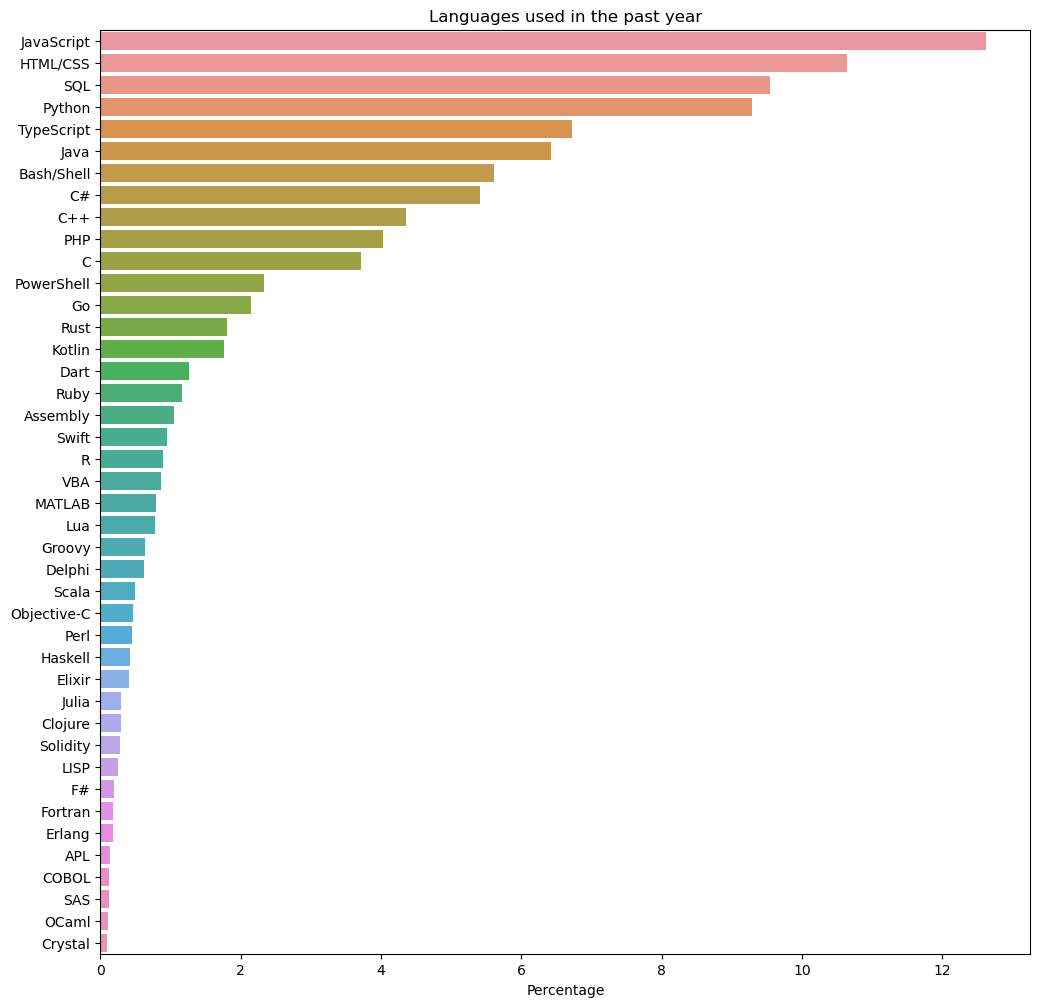

In [81]:
plt.figure(figsize=(12, 12))
sns.barplot(x=lang_percentage, y=lang_percentage.index)
plt.title("Languages used in the past year")
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()

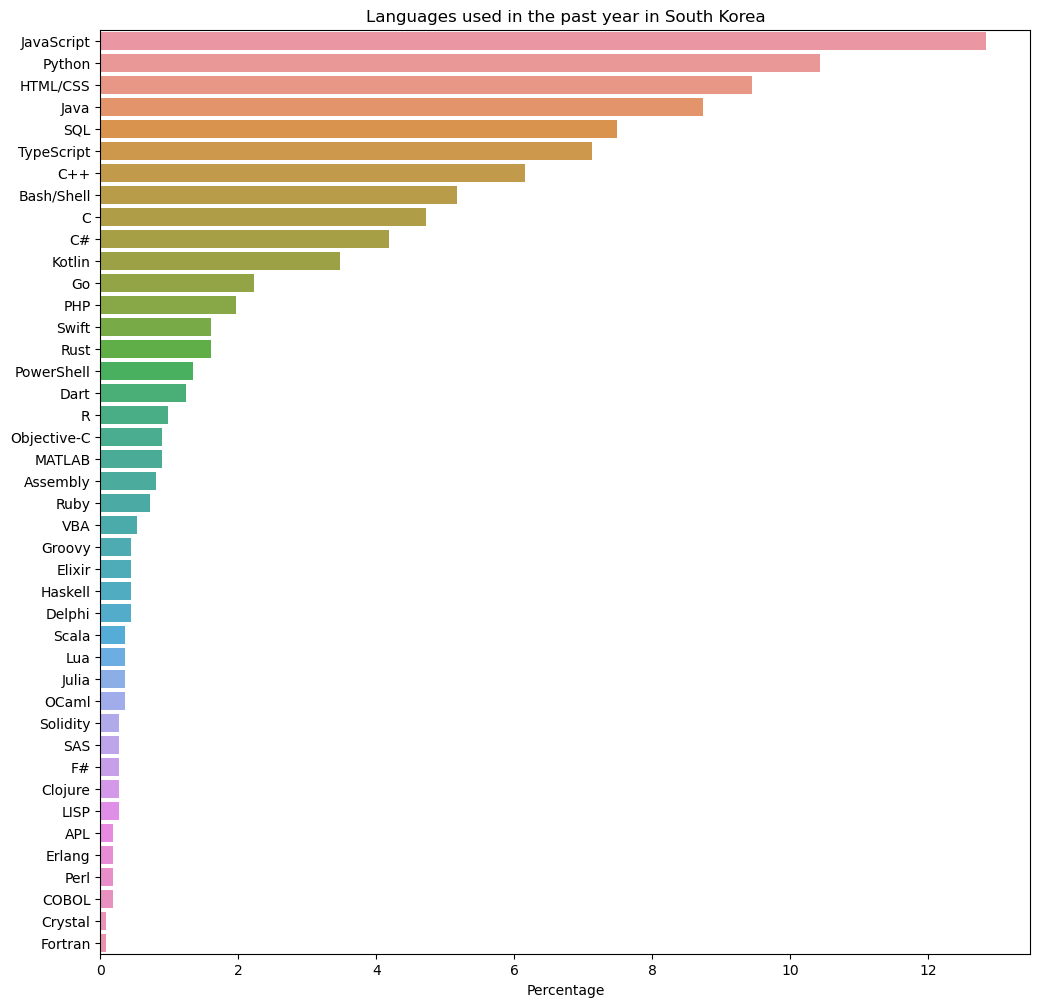

In [122]:
lang_kor_df = LanguageHaveWorkedWith_df[survey_df.Country == 'South Korea']
lang_kor_total = lang_kor_df.sum().sort_values(ascending=False)
lang_kor_percentage = lang_kor_total / lang_kor_total.sum() * 100

plt.figure(figsize=(12, 12))
sns.barplot(x=lang_kor_percentage, y=lang_kor_percentage.index)
plt.title("Languages used in the past year in South Korea")
plt.xlabel('Percentage')
plt.ylabel(None)
plt.show()

In [136]:
home_country = survey_df[(survey_df["Country"] == "South Korea") | (survey_df["Country"] == "Republic of Korea")]
home_language_worked_df = LanguageHaveWorkedWith_df[home_country]
home_language_worked_df

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,Lua,PHP,...,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
home_languages_worked_totals = home_language_worked_df.sum().sort_values(ascending = False)
home_languages_worked_totals

JavaScript     0
Assembly       0
Go             0
Kotlin         0
Groovy         0
MATLAB         0
Perl           0
Haskell        0
Julia          0
LISP           0
F#             0
TypeScript     0
Clojure        0
APL            0
Crystal        0
Fortran        0
Objective-C    0
SAS            0
OCaml          0
Solidity       0
Dart           0
VBA            0
Scala          0
R              0
C#             0
C++            0
HTML/CSS       0
Python         0
SQL            0
Swift          0
Lua            0
PHP            0
C              0
Java           0
Delphi         0
Bash/Shell     0
PowerShell     0
Rust           0
Elixir         0
Erlang         0
Ruby           0
COBOL          0
dtype: object